In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
# The CIFAR MNIST data is available directly in the tf.keras datasets API

cifar = tf.keras.datasets.cifar10

In [0]:
# load_data will give you two sets of two lists, 
# training and testing values that contain the clothing items and their labels.

(training_images, training_labels) ,  (test_images, test_labels) = cifar.load_data()

In [0]:
# print shape and data type

print(training_images.shape, training_images.dtype)
print(training_labels.shape, training_labels.dtype)
print(test_images.shape, test_images.dtype)
print(test_labels.shape, test_labels.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) uint8


In [0]:
# labels

# print(training_labels[:10])
# print(test_labels[:10])

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[6]
cat


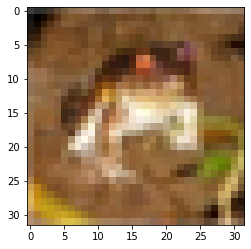

In [0]:
# plot images

plt.imshow(training_images[0])
print(training_labels[0])
print(class_names[int(training_labels[9])])

In [0]:
# For various reasons it's easier if we treat all values as between 0 and 1
# a process called 'normalizing'

training_images = training_images/255.0
test_images = test_images/255.

print(training_images.shape, training_images.dtype)
print(test_images.shape, test_images.dtype)

(50000, 32, 32, 3) float64
(10000, 32, 32, 3) float64


In [0]:
# No need to reshape

In [0]:
# Sequential: That defines a sequence of layers in the neural network
# Flatten: Flatten just takes multidiamentional array and turns it into a 1D array
# Dense: Adds a layer of neurons

# Activation function: Each layer of neurons need it, to tell them what to do. There's lots of options.
#   Relu means "If X>0 return X, else return 0"
#     so it only passes values 0 or greater to the next layer.
#   Softmax takes a set of values, and effectively picks the biggest one, 
#     if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], 
#     it turns it into [0,0,0,0,1,0,0,0,0]

# Convolution: Takes an filter/array (usually 3x3 or 5x5) and pass it over the image. 
#   By changing the underlying pixels based on the formula within that matrix, 
#   you can do things like edge detection

# First layer takes 32*32 single channel images, 
#   and apply 64 filters of size 3*3, 
#   and apply relu activation function

# Second layer pass 2*2 max pooling layer over the image,
#  and giving a reduced image

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'), 
  tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Loss function —This measures how accurate the model is during training. 
#   You want to minimize this function to "steer" the model in the right direction.
# Optimizer —This is how the model is updated 
#    based on the data it sees and its loss function.
# Metrics —Used to monitor the training and testing steps. 
#   The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# cancelling training before the completeion of given epoch on reaching below desired loss level

# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('loss')<0.26):
#       print("\nCancelling training!")
#       self.model.stop_training = True

# callbacks = myCallback()

In [0]:
history = model.fit(training_images, training_labels, epochs=5)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.4092 - acc: 0.4934
Epoch 2/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.0617 - acc: 0.6281
Epoch 3/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 0.9216 - acc: 0.6781
Epoch 4/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 0.8151 - acc: 0.7154
Epoch 5/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 0.7346 - acc: 0.7452


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

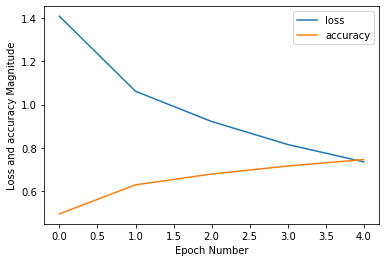

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss and accuracy Magnitude")
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['acc'], label='accuracy')
plt.legend()
plt.show()

In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 7s 672us/sample - loss: 0.8748 - acc: 0.7000


[0.8747550295829774, 0.7]

In [0]:
classifications = model.predict(test_images)

In [0]:
print(classifications[0])
# plt.imshow(test_images[0])
print(test_labels[0])
print(class_names[int(training_labels[0])])

[1.7221924e-02 2.1532397e-03 8.3703743e-03 8.4156865e-01 1.5494345e-03
 1.0746359e-01 1.7198849e-02 1.3739349e-04 3.7388196e-03 5.9773488e-04]
[3]
frog
